In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lena = np.load("lena.npy")
cameraman = np.load("cameraman.npy")

In [3]:
print("Lena:", lena.shape, lena.dtype)

Lena: (512, 512) uint8


In [4]:
print("cameraman:", cameraman.shape, cameraman.dtype)

cameraman: (256, 256) uint8


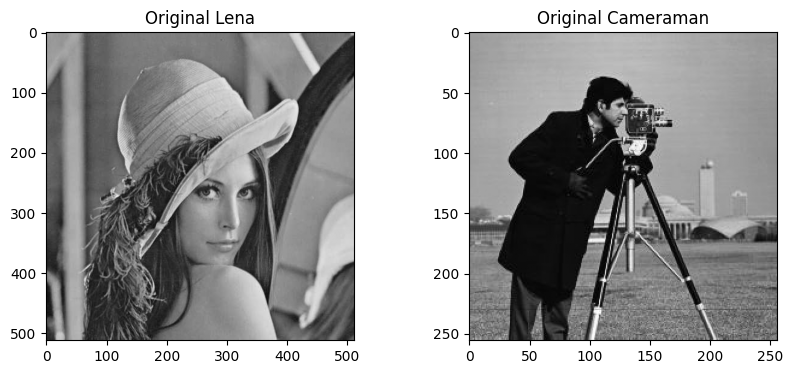

In [5]:
plt.figure(figsize=(10, 4))
# plt.title("Original", axis = 'off')

plt.subplot(1, 2, 1)
plt.imshow(lena, cmap='gray')
plt.title("Original Lena")
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(cameraman, cmap='gray')
plt.title("Original Cameraman")
plt.axis('on')

plt.show()


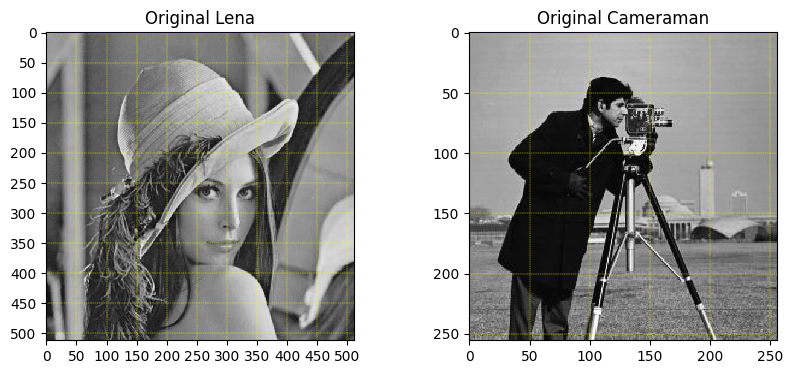

In [6]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(lena, cmap='gray', interpolation='nearest')
plt.title("Original Lena")
plt.axis('on')
plt.xticks(range(0, lena.shape[1], 50))
plt.yticks(range(0, lena.shape[0], 50))
plt.grid(color='yellow', linestyle='--', linewidth=0.3)

plt.subplot(1, 2, 2)
plt.imshow(cameraman, cmap='gray', interpolation='nearest')
plt.title("Original Cameraman")
plt.axis('on')
plt.xticks(range(0, cameraman.shape[1], 50))
plt.yticks(range(0, cameraman.shape[0], 50))
plt.grid(color='yellow', linestyle='--', linewidth=0.3)

plt.show()


In [7]:
ref = lena
target_h, target_w = ref.shape

In [8]:
print("Reference min/max:", ref.min(), ref.max())
print("Cameraman min/max:", cameraman.min(), cameraman.max())

Reference min/max: 10 255
Cameraman min/max: 0 255


In [9]:
def psnr(img1, img2):
    h, w = img1.shape
    mse = 0.0

    for i in range(h):
        for j in range(w):
            p1 = float(img1[i, j])
            p2 = float(img2[i, j])
            diff = p1 - p2
            mse += diff**2

    mse /= (h*w)

    if mse == 0:
        return float("inf")
    
    MAX = 255.0
    return 10 * np.log10(MAX**2 / mse)

In [10]:
print(psnr(ref, ref))

inf


In [11]:
def nn_resize(img, new_h, new_w):
    h, w = img.shape
    out = np.zeros((new_h, new_w), dtype = np.uint8)

    x_ratio = h / new_h
    y_ratio = w / new_w

    for i in range(new_h):
        for j in range(new_w):
            src_x = int(i * x_ratio)
            src_y = int(j * y_ratio)

            if src_x >= h:
                src_x = h-1
            if src_y >= w:
                src_y = w-1

            out[i, j] = img[src_x, src_y]
    
    return out

In [12]:
cam_nn = nn_resize(cameraman, target_h, target_w)

In [13]:
psnr_nn = psnr(ref, cam_nn)
print("PSNR (Nearest Neighbour) :", psnr_nn)

PSNR (Nearest Neighbour) : 11.069723902701842


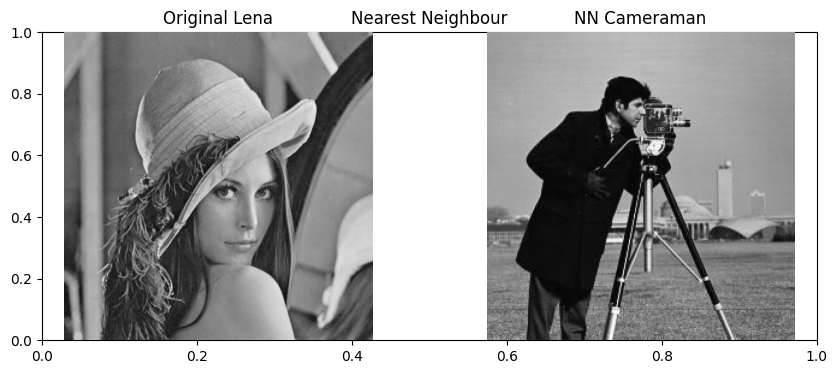

In [14]:
plt.figure(figsize=(10, 4))
plt.title("Nearest Neighbour")

plt.subplot(1, 2, 1)
plt.imshow(lena, cmap='gray')
plt.title('Original Lena')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cam_nn, cmap='gray')
plt.title('NN Cameraman')
plt.axis("off")

plt.show()

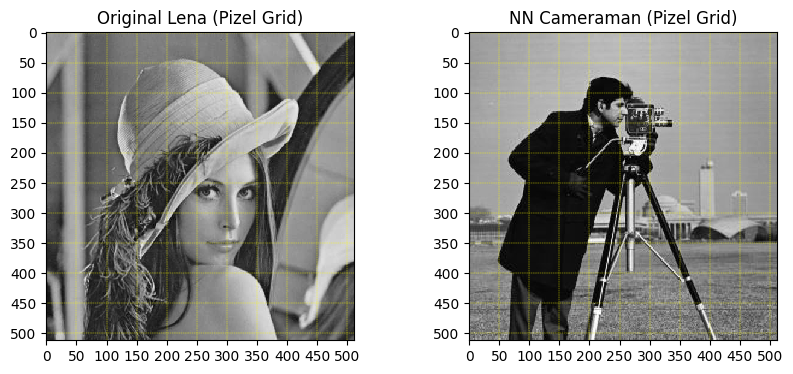

In [15]:
plt.figure(figsize=(10, 4))

# ---- Original Lena ----
plt.subplot(1, 2, 1)
plt.imshow(lena, cmap='gray', interpolation='nearest')
plt.title("Original Lena (Pizel Grid)")

plt.xlim(-0.5, lena.shape[1] - 0.5)
plt.ylim(lena.shape[0] - 0.5, -0.5)

plt.xticks(range(0, lena.shape[1], 50))
plt.yticks(range(0, lena.shape[0], 50))
plt.grid(color='yellow', linestyle='--', linewidth=0.3)

# ---- NN Cameraman ----
plt.subplot(1, 2, 2)
plt.imshow(cam_nn, cmap='gray', interpolation='nearest')
plt.title("NN Cameraman (Pizel Grid)")

plt.xlim(-0.5, cam_nn.shape[1] - 0.5)
plt.ylim(cam_nn.shape[0] - 0.5, -0.5)

plt.xticks(range(0, cam_nn.shape[1], 50))
plt.yticks(range(0, cam_nn.shape[0], 50))
plt.grid(color='yellow', linestyle='--', linewidth=0.3)

plt.show()


In [16]:
def bilinear_resize(img, new_h, new_w):
    h, w = img.shape
    out = np.zeros((new_h, new_w), dtype = np.uint8)

    x_ratio = (h-1) / new_h
    y_ratio = (w-1) / new_w

    for i in range(new_h):
        for j in range(new_w):
            x = i * x_ratio
            y = j * y_ratio

            x0 = int(x)
            y0 = int(y)
            x1 = min(x0 + 1, h - 1)
            y1 = min(y0 + 1, w - 1)

            dx = x - x0
            dy = y - y0

            p00 = float(img[x0, y0])
            p10 = float(img[x1, y0])
            p01 = float(img[x0, y1])
            p11 = float(img[x1, y1])

            val = (
                (1 - dx) * (1 - dy) * p00 +
                dx * (1 - dy) * p10 + 
                (1 - dx) * dy * p01 + 
                dx * dy * p11
            )

            out[i, j] = int(round(val))

    return out


In [17]:
cam_bl = bilinear_resize(cameraman, target_h, target_w)
psnr_bl = psnr(ref, cam_bl)

print("PSNR (Bilinear) : ", psnr_bl)

PSNR (Bilinear) :  11.16353125940216


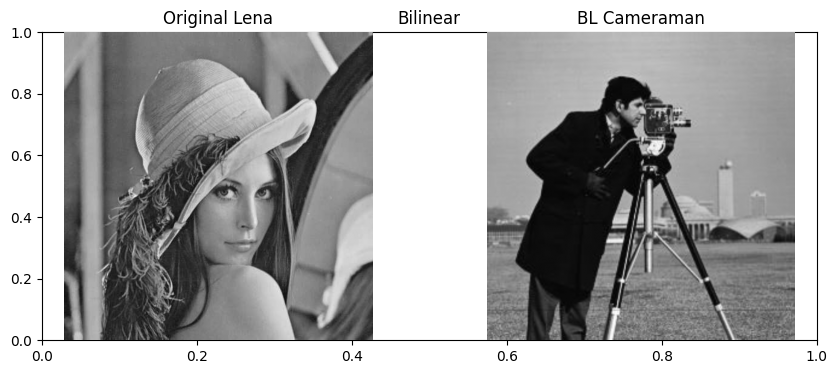

In [18]:
plt.figure(figsize=(10, 4))
plt.title("Bilinear")

plt.subplot(1, 2, 1)
plt.imshow(lena, cmap='gray')
plt.title('Original Lena')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cam_bl, cmap='gray')
plt.title('BL Cameraman')
plt.axis("off")

plt.show()

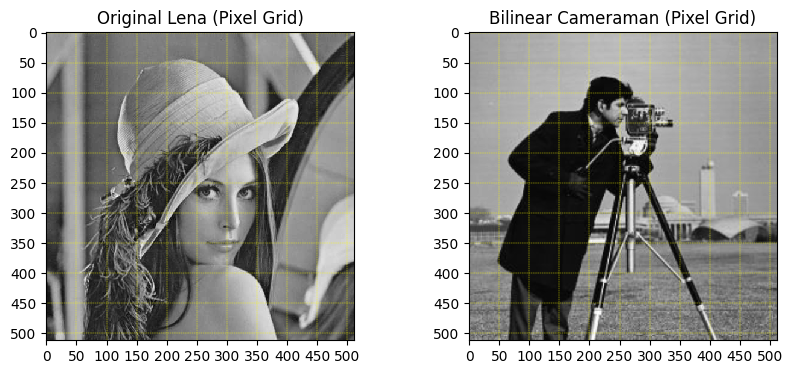

In [19]:
plt.figure(figsize=(10, 4))

# ---- Original Lena ----
plt.subplot(1, 2, 1)
plt.imshow(lena, cmap='gray', interpolation='nearest')
plt.title("Original Lena (Pixel Grid)")

plt.xlim(-0.5, lena.shape[1] - 0.5)
plt.ylim(lena.shape[0] - 0.5, -0.5)

plt.xticks(range(0, lena.shape[1], 50))
plt.yticks(range(0, lena.shape[0], 50))
plt.grid(color='yellow', linestyle='--', linewidth=0.3)

# ---- Bilinear Cameraman ----
plt.subplot(1, 2, 2)
plt.imshow(cam_bl, cmap='gray', interpolation='nearest')
plt.title("Bilinear Cameraman (Pixel Grid)")

plt.xlim(-0.5, cam_bl.shape[1] - 0.5)
plt.ylim(cam_bl.shape[0] - 0.5, -0.5)

plt.xticks(range(0, cam_bl.shape[1], 50))
plt.yticks(range(0, cam_bl.shape[0], 50))
plt.grid(color='yellow', linestyle='--', linewidth=0.3)

plt.show()


In [20]:
def cubic(x):
    x = abs(x)
    if x <= 1:
        return 1 - 2*x*x + x*x*x
    elif x < 2:
        return 4 - 8*x + 5*x*x - x*x*x
    else:
        return 0

In [21]:
def bicubic_resize(img, new_h, new_w):
    h, w = img.shape
    out = np.zeros((new_h, new_w), dtype=np.uint8)

    x_ratio = h / new_h
    y_ratio = w / new_w

    for i in range(new_h):
        for j in range(new_w):
            x = i * x_ratio
            y = j * y_ratio

            x_int = int(x)
            y_int = int(y)

            val = 0.0
            weight_sum = 0.0

            for m in range(-1, 3):
                for n in range(-1, 3):
                    xm = min(max(x_int + m, 0), h - 1)
                    yn = min(max(y_int + n, 0), w - 1)

                    wx = cubic(x - (x_int + m))
                    wy = cubic(y - (y_int + n))
                    wgt = wx * wy

                    val += float(img[xm, yn]) * wgt
                    weight_sum += wgt

            if weight_sum != 0:
                val /= weight_sum

            out[i, j] = int(round(min(max(val, 0), 255)))

    return out


In [22]:
cam_bc = bicubic_resize(cameraman, target_h, target_w)
psnr_bc = psnr(ref, cam_bc)

print("PSNR (Bicubic):", psnr_bc)


PSNR (Bicubic): 11.058409868134383


In [23]:
def downsample(img, factor):
    h, w = img.shape
    new_h = h // factor
    new_w = w // factor

    out = np.zeros((new_h, new_w), dtype=np.uint8)

    for i in range(new_h):
        for j in range(new_w):
            out[i, j] = img[i * factor, j * factor]

    return out


In [24]:
cam_ds = downsample(cameraman, factor=2)

In [25]:
cam_nn = nn_resize(cam_ds, cameraman.shape[0], cameraman.shape[1])
cam_bl = bilinear_resize(cam_ds, cameraman.shape[0], cameraman.shape[1])
cam_bc = bicubic_resize(cam_ds, cameraman.shape[0], cameraman.shape[1])


In [26]:
print("PSNR NN:", psnr(cameraman, cam_nn))
print("PSNR Bilinear:", psnr(cameraman, cam_bl))
print("PSNR Bicubic:", psnr(cameraman, cam_bc))


PSNR NN: 22.386268085820127
PSNR Bilinear: 21.297733463680323
PSNR Bicubic: 25.114500270584983
